In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist_data = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist_data.load_data()
a = np.array(x_train)
a.shape

(60000, 28, 28)

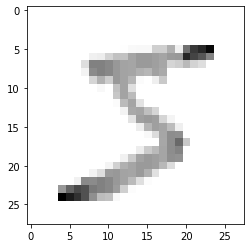

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [5]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
__________

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
model.fit(x=x_train,y=y_train,batch_size=1000,epochs=10,shuffle=True)

Epoch 1/10
60000/60000 [==============================]60000/60000 [==============================] - 833s 14ms/step - loss: 0.1077 - acc: 0.9670

Epoch 2/10
60000/60000 [==============================]60000/60000 [==============================] - 760s 13ms/step - loss: 0.0714 - acc: 0.9783

Epoch 3/10
60000/60000 [==============================]60000/60000 [==============================] - 813s 14ms/step - loss: 0.0564 - acc: 0.9828

Epoch 4/10
60000/60000 [==============================]60000/60000 [==============================] - 732s 12ms/step - loss: 0.0456 - acc: 0.9861

Epoch 5/10
60000/60000 [==============================]60000/60000 [==============================] - 730s 12ms/step - loss: 0.0409 - acc: 0.9874

Epoch 6/10
60000/60000 [==============================]60000/60000 [==============================] - 724s 12ms/step - loss: 0.0342 - acc: 0.9894

Epoch 7/10
60000/60000 [==============================]60000/60000 [==============================] - 740s 12ms/step -

In [14]:
loss,acc = model.evaluate(x_test,y_test)
print(loss,acc)

10000/10000 [==============================]10000/10000 [==============================] - 8s 825us/step

0.03332427344108582 0.9896


In [13]:
pred.argmax(axis=1)

NameError: name 'pred' is not defined

In [15]:
model.save('digit.h5')
print("saved model to disk")

saved model to disk


In [ ]:
print(tf.__version__)